In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data 
import pandas as pd
import numpy as np
train_file = pd.read_csv("Data/train.csv")
test_file = pd.read_csv("Data/test.csv")
stores_file = pd.read_csv("Data/stores.csv")
features_file = pd.read_csv("Data/features.csv")

In [3]:
# First have a look on all dataset files

In [4]:
# Checking for Store Dataset
from IPython.core.display import HTML
display(HTML(stores_file.head().to_html()))

,Store,Type,Size
0,9,B,125833
1,19,A,203819
2,27,A,204184
3,30,C,42988
4,34,A,158114


In [5]:
# Checking for Feature Dataset
from IPython.core.display import HTML
display(HTML(features_file.head().to_html()))

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,9,2010-02-05,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415,False
1,9,2010-02-12,37.08,2.548,NaN,NaN,NaN,NaN,NaN,214.805653,6.415,True
2,9,2010-02-19,43.06,2.514,NaN,NaN,NaN,NaN,NaN,214.850618,6.415,False
3,9,2010-02-26,43.83,2.561,NaN,NaN,NaN,NaN,NaN,214.878045,6.415,False
4,9,2010-03-05,48.43,2.625,NaN,NaN,NaN,NaN,NaN,214.905472,6.415,False


In [6]:
# Checking for Train Dataset
from IPython.core.display import HTML
display(HTML(train_file.head().to_html()))

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,9,1,2010-02-05,12861.40,False
1,9,1,2010-02-12,20273.94,True
2,9,1,2010-02-19,14819.97,False
3,9,1,2010-02-26,10530.98,False
4,9,1,2010-03-05,10438.47,False


In [7]:
# Checking for Test Dataset
from IPython.core.display import HTML
display(HTML(test_file.head().to_html()))

,Store,Dept,Date,IsHoliday
0,9,1,2012-11-02,False
1,9,1,2012-11-09,False
2,9,1,2012-11-16,False
3,9,1,2012-11-23,True
4,9,1,2012-11-30,False


In [8]:
# Looking at info of store file
stores_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
Store    9 non-null int64
Type     9 non-null object
Size     9 non-null int64
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [9]:
# Looking at info of Features
features_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 12 columns):
Store           1638 non-null int64
Date            1638 non-null object
Temperature     1638 non-null float64
Fuel_Price      1638 non-null float64
MarkDown1       805 non-null float64
MarkDown2       512 non-null float64
MarkDown3       713 non-null float64
MarkDown4       596 non-null float64
MarkDown5       810 non-null float64
CPI             1521 non-null float64
Unemployment    1521 non-null float64
IsHoliday       1638 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 142.5+ KB


In [10]:
# Looking at info of train file
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7610 entries, 0 to 7609
Data columns (total 5 columns):
Store           7610 non-null int64
Dept            7610 non-null int64
Date            7610 non-null object
Weekly_Sales    7610 non-null float64
IsHoliday       7610 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 245.4+ KB


In [11]:
#Performing data preparation and feature engineering steps.

In [12]:
# Data Preparation 
# Train Data
# Merging Data of train file with store
merge_train = pd.merge(train_file, stores_file, on='Store', how='inner')
#merging the resultant file with features.
merge_train = pd.merge(merge_train, features_file, on=['Store', 'Date','IsHoliday'], how='inner')

In [13]:
#Displaying final train dataset file
display(HTML(merge_train.head().to_html()))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,9,1,2010-02-05,12861.40,False,B,125833,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
1,9,2,2010-02-05,24917.84,False,B,125833,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
2,9,3,2010-02-05,6733.37,False,B,125833,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
3,9,4,2010-02-05,17483.90,False,B,125833,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
4,9,5,2010-02-05,20476.63,False,B,125833,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415


In [14]:
# Looking for statistic of final train file
merge_train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,2691.000000,1655.000000,2389.000000,2028.00000,2715.000000,7610.000000,7610.000000
mean,31.638633,3.470696,16996.230852,116402.688042,60.196744,3.352190,5951.799569,2898.836943,1017.279309,3187.97215,3532.250759,166.129327,8.180358
std,11.431789,1.702084,16767.433314,61480.176670,17.168700,0.454011,8064.899968,7329.178182,7286.442182,6761.66015,3462.321150,37.620378,1.308386
min,9.000000,1.000000,-26.610000,39910.000000,16.940000,2.514000,1.500000,-265.760000,0.010000,0.41000,153.040000,126.064000,4.954000
25%,27.000000,2.000000,5416.720000,42988.000000,46.540000,2.917500,505.280000,36.200000,3.500000,351.55000,1429.770000,132.724839,7.658000
50%,34.000000,3.000000,13075.555000,118221.000000,62.200000,3.422000,3297.480000,222.120000,14.820000,1297.64500,2609.220000,140.912402,8.185000
75%,43.000000,5.000000,22697.387500,158114.000000,74.445000,3.730000,8247.790000,1915.855000,77.540000,3086.53000,4554.390000,210.555230,8.876000
max,45.000000,6.000000,138618.500000,204184.000000,94.220000,4.211000,62567.600000,50438.170000,88805.580000,67474.85000,33247.000000,227.232807,10.641000


In [15]:
# Looking for info of final train file
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 7609
Data columns (total 16 columns):
Store           7610 non-null int64
Dept            7610 non-null int64
Date            7610 non-null object
Weekly_Sales    7610 non-null float64
IsHoliday       7610 non-null bool
Type            7610 non-null object
Size            7610 non-null int64
Temperature     7610 non-null float64
Fuel_Price      7610 non-null float64
MarkDown1       2691 non-null float64
MarkDown2       1655 non-null float64
MarkDown3       2389 non-null float64
MarkDown4       2028 non-null float64
MarkDown5       2715 non-null float64
CPI             7610 non-null float64
Unemployment    7610 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 958.7+ KB


In [16]:
#checking null values in final train dataset
merge_train.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4919
MarkDown2       5955
MarkDown3       5221
MarkDown4       5582
MarkDown5       4895
CPI                0
Unemployment       0
dtype: int64

In [17]:
import seaborn as sns
sns.heatmap(merge_train.isnull(),yticklabels=False,cbar=False)

In [18]:
# Checking percentage of missing values for features
per = merge_train.isnull().sum() * 100 / len(merge_train)
val = pd.DataFrame({'Features': merge_train.columns,
                                 'missing%': per})
val

,Features,missing%
Store,Store,0.000000
Dept,Dept,0.000000
Date,Date,0.000000
Weekly_Sales,Weekly_Sales,0.000000
IsHoliday,IsHoliday,0.000000
Type,Type,0.000000
Size,Size,0.000000
Temperature,Temperature,0.000000
Fuel_Price,Fuel_Price,0.000000
MarkDown1,MarkDown1,64.638633


In [19]:
#It is observed that MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 have more than 50% missing values. So filling it with null values is better idea.
# filling null values with zeros.
merge_train['MarkDown1']=merge_train['MarkDown1'].fillna(0)
merge_train['MarkDown2']=merge_train['MarkDown2'].fillna(0)
merge_train['MarkDown3']=merge_train['MarkDown3'].fillna(0)
merge_train['MarkDown4']=merge_train['MarkDown4'].fillna(0)
merge_train['MarkDown5']=merge_train['MarkDown5'].fillna(0)
# filling null values with mean value of columns
merge_train.CPI.fillna(merge_train.CPI.mean(),inplace=True)
merge_train.Unemployment.fillna(merge_train.Unemployment.mean(),inplace=True)
merge_train.Temperature.fillna(merge_train.Temperature.mean(),inplace=True)
merge_train.Fuel_Price.fillna(merge_train.Fuel_Price.mean(),inplace=True)

In [20]:
#checking null values in final dataset after filling it
merge_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [21]:
#checking at IsHoliday feature count in train file
merge_train.IsHoliday.value_counts()

False    7076
True      534
Name: IsHoliday, dtype: int64

In [22]:
#lable encoding 
# IsHoliday is a categorical feature so i am applying lable encoding on it for furthur processing.
from sklearn.preprocessing import LabelEncoder
lable_en = LabelEncoder()
merge_train['IsHoliday'] = lable_en.fit_transform(merge_train['IsHoliday'])
display(HTML(merge_train.head().to_html()))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,9,1,2010-02-05,12861.40,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415
1,9,2,2010-02-05,24917.84,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415
2,9,3,2010-02-05,6733.37,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415
3,9,4,2010-02-05,17483.90,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415
4,9,5,2010-02-05,20476.63,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415


In [23]:
#Data column Formatting 
merge_train['year'] = pd.DatetimeIndex(merge_train['Date']).year
merge_train['month'] = pd.DatetimeIndex(merge_train['Date']).month
merge_train['day'] = pd.DatetimeIndex(merge_train['Date']).day

In [24]:
display(HTML(merge_train.head().to_html()))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,9,1,2010-02-05,12861.40,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,2010,2,5
1,9,2,2010-02-05,24917.84,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,2010,2,5
2,9,3,2010-02-05,6733.37,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,2010,2,5
3,9,4,2010-02-05,17483.90,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,2010,2,5
4,9,5,2010-02-05,20476.63,0,B,125833,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,2010,2,5


In [25]:
#Performing data preparation and feature engineering steps on final test file

In [26]:
# Test Dataset
# Merging Data of test file with store and then merging the resultant file with features
merge_test = pd.merge(test_file, stores_file, on='Store', how='inner')
merge_test = pd.merge(merge_test, features_file, on=['Store', 'Date','IsHoliday'], how='inner')

In [27]:
display(HTML(merge_test.head().to_html()))

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,9,1,2012-11-02,False,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
1,9,2,2012-11-02,False,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
2,9,3,2012-11-02,False,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
3,9,4,2012-11-02,False,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
4,9,5,2012-11-02,False,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954


In [28]:
# Looking for statistic of final test file
merge_test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.00000,2065.000000,1390.000000,1835.000000,1534.000000,2071.000000,1378.000000,1378.000000
mean,31.630130,3.457750,116562.995654,54.001845,3.58431,5885.648939,3307.232165,1895.915793,3060.243924,2638.009358,171.420481,7.446410
std,11.440345,1.691132,61459.667882,17.171902,0.24562,9712.976345,7206.598403,11588.059006,7941.465105,2587.770377,39.589564,1.515611
min,9.000000,1.000000,39910.000000,11.440000,2.91400,-2781.450000,0.010000,-179.260000,0.630000,134.470000,131.236226,4.872000
25%,27.000000,2.000000,42988.000000,41.060000,3.41700,625.080000,159.070000,7.700000,84.910000,1027.880000,138.457531,6.170000
50%,34.000000,3.000000,118221.000000,52.910000,3.60900,3054.450000,667.880000,43.500000,633.730000,1842.480000,142.970823,8.000000
75%,43.000000,5.000000,158114.000000,66.650000,3.78400,7118.910000,2392.390000,204.190000,2626.272500,3263.710000,216.002541,8.667000
max,45.000000,6.000000,204184.000000,90.700000,4.07900,88750.340000,49026.300000,115048.810000,60065.820000,17257.640000,228.976456,8.934000


In [29]:
# Looking at info of final test file
merge_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 15 columns):
Store           2071 non-null int64
Dept            2071 non-null int64
Date            2071 non-null object
IsHoliday       2071 non-null bool
Type            2071 non-null object
Size            2071 non-null int64
Temperature     2071 non-null float64
Fuel_Price      2071 non-null float64
MarkDown1       2065 non-null float64
MarkDown2       1390 non-null float64
MarkDown3       1835 non-null float64
MarkDown4       1534 non-null float64
MarkDown5       2071 non-null float64
CPI             1378 non-null float64
Unemployment    1378 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 244.7+ KB


In [30]:
#checking null values in final dataset
merge_test.isna().sum()

Store             0
Dept              0
Date              0
IsHoliday         0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1         6
MarkDown2       681
MarkDown3       236
MarkDown4       537
MarkDown5         0
CPI             693
Unemployment    693
dtype: int64

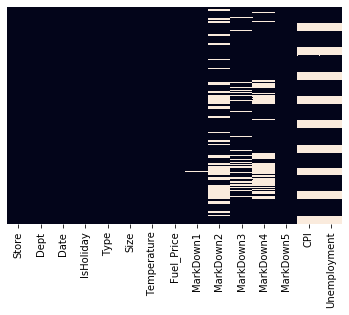

In [31]:
sns.heatmap(merge_test.isnull(),yticklabels=False,cbar=False)

In [32]:
# Checking percentage of missing values for features
per = merge_test.isnull().sum() * 100 / len(merge_test)
val = pd.DataFrame({'Features': merge_test.columns,
                                 'missing%': per})
val

,Features,missing%
Store,Store,0.000000
Dept,Dept,0.000000
Date,Date,0.000000
IsHoliday,IsHoliday,0.000000
Type,Type,0.000000
Size,Size,0.000000
Temperature,Temperature,0.000000
Fuel_Price,Fuel_Price,0.000000
MarkDown1,MarkDown1,0.289715
MarkDown2,MarkDown2,32.882665


In [33]:
# filling null values

merge_test['MarkDown1']=merge_test['MarkDown1'].fillna(0)
merge_test['MarkDown2']=merge_test['MarkDown2'].fillna(0)
merge_test['MarkDown3']=merge_test['MarkDown3'].fillna(0)
merge_test['MarkDown4']=merge_test['MarkDown4'].fillna(0)
merge_test['MarkDown5']=merge_test['MarkDown5'].fillna(0)

merge_test.CPI.fillna(merge_test.CPI.mean(),inplace=True)
merge_test.Unemployment.fillna(merge_test.Unemployment.mean(),inplace=True)
merge_test.Temperature.fillna(merge_test.Temperature.mean(),inplace=True)
merge_test.Fuel_Price.fillna(merge_test.Fuel_Price.mean(),inplace=True)

In [34]:
#checking null values again after filling
merge_test.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [35]:
#checking at IsHoliday feature count
merge_test.IsHoliday.value_counts()

False    1912
True      159
Name: IsHoliday, dtype: int64

In [36]:
#lable encoding
from sklearn.preprocessing import LabelEncoder
lable_en1 = LabelEncoder()
merge_test['IsHoliday'] = lable_en1.fit_transform(merge_test['IsHoliday'])
display(HTML(merge_test.head().to_html()))

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,9,1,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
1,9,2,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
2,9,3,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
3,9,4,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954
4,9,5,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954


In [37]:
#Data column Formatting
merge_test['year'] = pd.DatetimeIndex(merge_test['Date']).year
merge_test['month'] = pd.DatetimeIndex(merge_test['Date']).month
merge_test['day'] = pd.DatetimeIndex(merge_test['Date']).day

In [38]:
display(HTML(merge_test.head().to_html()))

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,9,1,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954,2012,11,2
1,9,2,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954,2012,11,2
2,9,3,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954,2012,11,2
3,9,4,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954,2012,11,2
4,9,5,2012-11-02,0,B,125833,56.26,3.386,2291.26,2178.48,65.25,20.52,1347.79,227.251326,4.954,2012,11,2


In [39]:
#Exploratoray Data Analysis

Text(0, 0.5, 'Weekly_Sales')

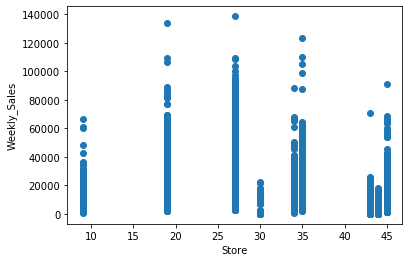

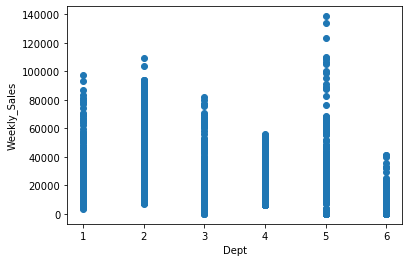

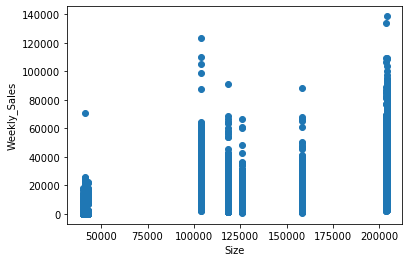

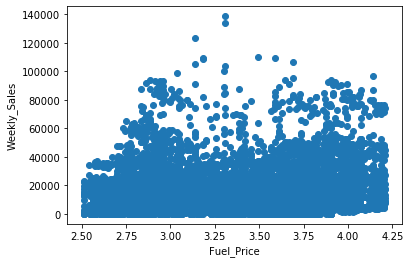

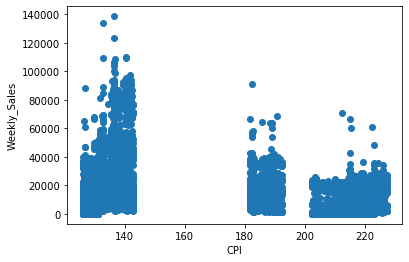

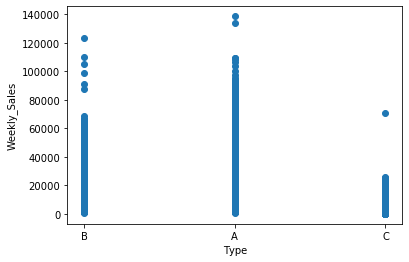

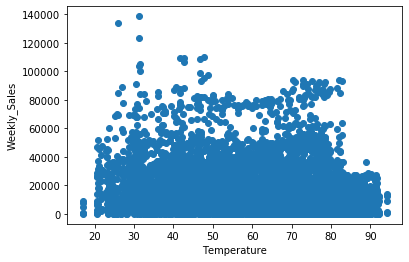

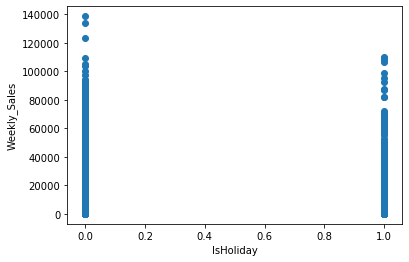

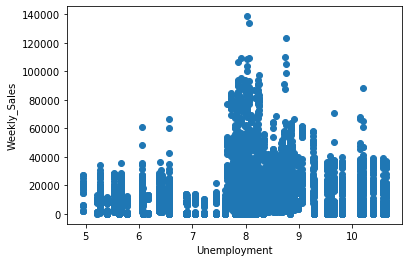

In [40]:
#Data visualization

# creating scatter plots to see data distribution of each feature with weekly sales.
import matplotlib.pyplot as plt
# WeeklySales Vs. Store
fig, ax1 = plt.subplots()
ax1.scatter(merge_train['Store'], merge_train['Weekly_Sales'])
ax1.set_xlabel('Store')
ax1.set_ylabel('Weekly_Sales')
# WeeklySales Vs. Department
fig, ax2 = plt.subplots()
ax2.scatter(merge_train['Dept'], merge_train['Weekly_Sales'])
ax2.set_xlabel('Dept')
ax2.set_ylabel('Weekly_Sales')
# WeeklySales Vs. Size
fig, ax3 = plt.subplots()
ax3.scatter(merge_train['Size'], merge_train['Weekly_Sales'])
ax3.set_xlabel('Size')
ax3.set_ylabel('Weekly_Sales')
# WeeklySales Vs. Fuel Price
fig, ax4 = plt.subplots()
ax4.scatter(merge_train['Fuel_Price'], merge_train['Weekly_Sales'])
ax4.set_xlabel('Fuel_Price')
ax4.set_ylabel('Weekly_Sales')
# WeeklySales Vs. CPI (consumer price index)
fig, ax5 = plt.subplots()
ax5.scatter(merge_train['CPI'], merge_train['Weekly_Sales'])
ax5.set_xlabel('CPI')
ax5.set_ylabel('Weekly_Sales')
# WeeklySales Vs. Type
fig, ax6 = plt.subplots()
ax6.scatter(merge_train['Type'], merge_train['Weekly_Sales'])
ax6.set_xlabel('Type')
ax6.set_ylabel('Weekly_Sales')
# WeeklySales Vs. Temperature
fig, ax7 = plt.subplots()
ax7.scatter(merge_train['Temperature'], merge_train['Weekly_Sales'])
ax7.set_xlabel('Temperature')
ax7.set_ylabel('Weekly_Sales')
# WeeklySales Vs. IsHoliday
fig, ax8 = plt.subplots()
ax8.scatter(merge_train['IsHoliday'], merge_train['Weekly_Sales'])
ax8.set_xlabel('IsHoliday')
ax8.set_ylabel('Weekly_Sales')
# WeeklySales Vs. Unemployment
fig, ax9 = plt.subplots()
ax9.scatter(merge_train['Unemployment'], merge_train['Weekly_Sales'])
ax9.set_xlabel('Unemployment')
ax9.set_ylabel('Weekly_Sales')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AC8C8C8>,
      dtype=object)

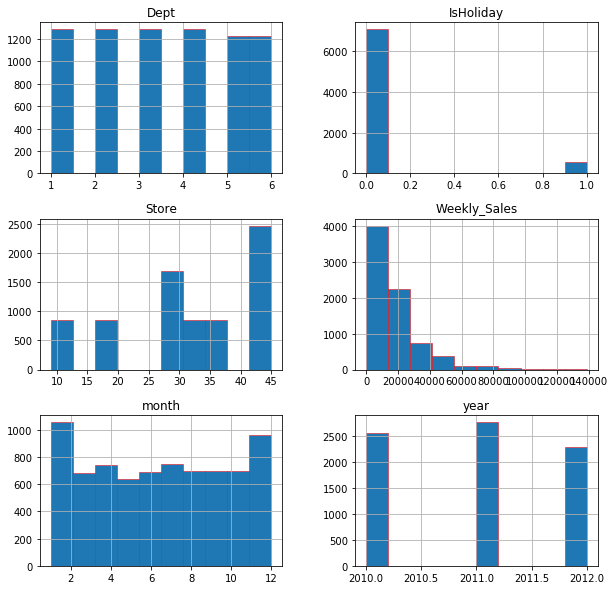

In [41]:
#Visualizing data of some features of dataset file
import matplotlib.pyplot as plt
merge_train.hist(column=['Dept','Store','Weekly_Sales','IsHoliday', 'month', 'year'],edgecolor='Red', linewidth=0.5, figsize=(10, 10))

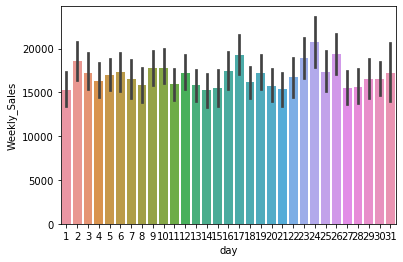

In [42]:
# visualizing sales per day
import seaborn as sns
Per_day = sns.barplot(x='day', y='Weekly_Sales', data=merge_train)

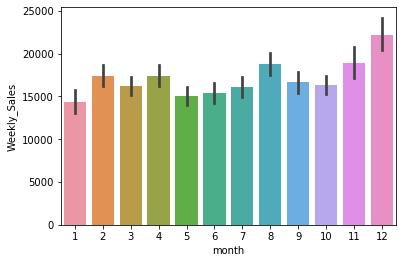

In [43]:
# Visualizing sales per month
Per_mon = sns.barplot(x='month', y='Weekly_Sales', data=merge_train)

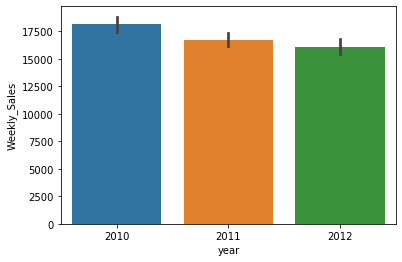

In [44]:
# Visualizing sales per year
Per_year = sns.barplot(x='year', y='Weekly_Sales', data=merge_train)

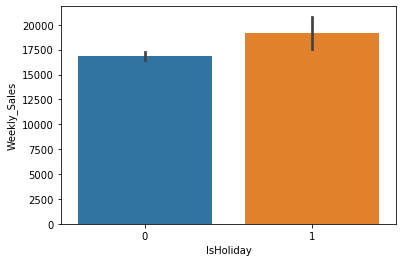

In [45]:
# Visualizing sales on Holiday vs no Holiday
holiday = sns.barplot(x='IsHoliday', y='Weekly_Sales', data=merge_train)

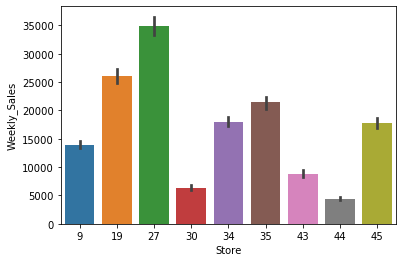

In [46]:
#checking average sale per store
Stor = sns.barplot(x='Store', y='Weekly_Sales', data=merge_train)

In [47]:
#Creating dummy varaibles for Type feature bcz its categorigal feature 
merge_train = pd.get_dummies(merge_train, columns=["Type"])
merge_test = pd.get_dummies(merge_test, columns=["Type"])

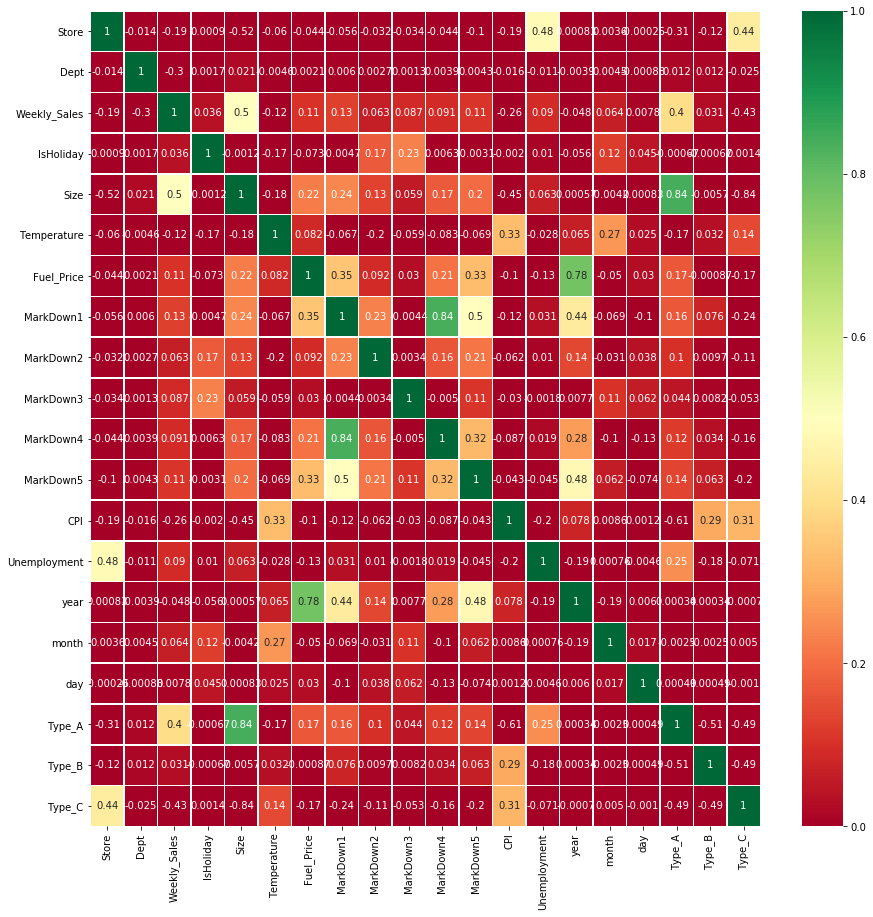

In [48]:
# Feature Correlation
plt.figure(figsize=(15,15))
sns.heatmap(merge_train.corr(), annot=True, cmap="RdYlGn", vmin=0, vmax=1, linewidths=.5)

In [49]:
feature_cor = merge_train.corr()
feature_cor

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,Type_A,Type_B,Type_C
Store,1.000000,-0.013769,-0.188055,0.000899,-0.518559,-0.060257,-0.043811,-0.056496,-0.032167,-0.033703,-0.044338,-0.099753,-0.187198,0.481775,0.000834,0.003556,-0.000248,-0.310960,-0.123332,0.439203
Dept,-0.013769,1.000000,-0.302978,0.001707,0.021040,-0.004632,0.002058,0.005970,0.002677,0.001315,0.003868,0.004303,-0.015798,-0.011384,-0.003912,0.004483,-0.000883,0.012309,0.012309,-0.024897
Weekly_Sales,-0.188055,-0.302978,1.000000,0.035696,0.502489,-0.119257,0.105256,0.127487,0.063132,0.087474,0.090822,0.106403,-0.258165,0.090217,-0.048396,0.064487,0.007829,0.398071,0.031181,-0.434106
IsHoliday,0.000899,0.001707,0.035696,1.000000,-0.001160,-0.168824,-0.072830,-0.004710,0.169156,0.232011,0.006273,-0.003121,-0.001974,0.010128,-0.055593,0.122788,0.045126,-0.000674,-0.000674,0.001363
Size,-0.518559,0.021040,0.502489,-0.001160,1.000000,-0.176921,0.224542,0.241778,0.129375,0.058592,0.168495,0.198093,-0.454877,0.062684,0.000573,-0.004248,0.000830,0.840835,-0.005710,-0.844570
Temperature,-0.060257,-0.004632,-0.119257,-0.168824,-0.176921,1.000000,0.082117,-0.067466,-0.201604,-0.058764,-0.083283,-0.068850,0.328250,-0.027698,0.065104,0.265142,0.025311,-0.173353,0.031747,0.143207
Fuel_Price,-0.043811,0.002058,0.105256,-0.072830,0.224542,0.082117,1.000000,0.347253,0.091822,0.030327,0.207911,0.328417,-0.101110,-0.125185,0.777428,-0.050421,0.030417,0.166397,-0.000869,-0.167400
MarkDown1,-0.056496,0.005970,0.127487,-0.004710,0.241778,-0.067466,0.347253,1.000000,0.232134,-0.004446,0.836007,0.498417,-0.123575,0.031300,0.437290,-0.069471,-0.101499,0.164355,0.075596,-0.242665
MarkDown2,-0.032167,0.002677,0.063132,0.169156,0.129375,-0.201604,0.091822,0.232134,1.000000,0.003361,0.162634,0.211030,-0.061633,0.009989,0.137912,-0.031023,0.038191,0.100026,0.009723,-0.110990
MarkDown3,-0.033703,0.001315,0.087474,0.232011,0.058592,-0.058764,0.030327,-0.004446,0.003361,1.000000,-0.004998,0.105654,-0.029617,-0.001797,0.007744,0.105255,0.062436,0.044201,0.008197,-0.052991


In [50]:
#correlation between features and target variable
cor_data=merge_train[merge_train.columns[1:]].corr()['Weekly_Sales'][:]
cor_data

Dept           -0.302978
Weekly_Sales    1.000000
IsHoliday       0.035696
Size            0.502489
Temperature    -0.119257
Fuel_Price      0.105256
MarkDown1       0.127487
MarkDown2       0.063132
MarkDown3       0.087474
MarkDown4       0.090822
MarkDown5       0.106403
CPI            -0.258165
Unemployment    0.090217
year           -0.048396
month           0.064487
day             0.007829
Type_A          0.398071
Type_B          0.031181
Type_C         -0.434106
Name: Weekly_Sales, dtype: float64

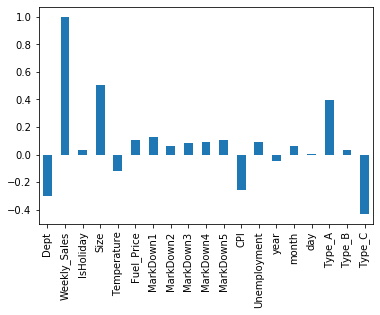

In [51]:
cor_data.plot.bar()

In [52]:
# Finalizing train dataset file
dummy_merge=merge_train
data_X1 = dummy_merge.drop(columns=['Weekly_Sales'])
data_X=data_X1.drop(columns=['Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
target = merge_train['Weekly_Sales']

In [53]:
#Dependent and Independent Varaibles
X=data_X
y=target

In [54]:
data_X

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Type_A,Type_B,Type_C
0,9,1,0,125833,38.01,2.572,214.655459,6.415,2010,2,5,0,1,0
1,9,2,0,125833,38.01,2.572,214.655459,6.415,2010,2,5,0,1,0
2,9,3,0,125833,38.01,2.572,214.655459,6.415,2010,2,5,0,1,0
3,9,4,0,125833,38.01,2.572,214.655459,6.415,2010,2,5,0,1,0
4,9,5,0,125833,38.01,2.572,214.655459,6.415,2010,2,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7605,45,2,0,118221,58.85,3.882,192.308899,8.667,2012,10,26,0,1,0
7606,45,3,0,118221,58.85,3.882,192.308899,8.667,2012,10,26,0,1,0
7607,45,4,0,118221,58.85,3.882,192.308899,8.667,2012,10,26,0,1,0
7608,45,5,0,118221,58.85,3.882,192.308899,8.667,2012,10,26,0,1,0


In [55]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 7609
Data columns (total 14 columns):
Store           7610 non-null int64
Dept            7610 non-null int64
IsHoliday       7610 non-null int64
Size            7610 non-null int64
Temperature     7610 non-null float64
Fuel_Price      7610 non-null float64
CPI             7610 non-null float64
Unemployment    7610 non-null float64
year            7610 non-null int64
month           7610 non-null int64
day             7610 non-null int64
Type_A          7610 non-null uint8
Type_B          7610 non-null uint8
Type_C          7610 non-null uint8
dtypes: float64(4), int64(7), uint8(3)
memory usage: 1.0 MB


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from math import sqrt
import numpy as np
import xgboost

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, target, test_size=0.2, shuffle=False, stratify=None)

In [58]:
#Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
MAE_dtr=metrics.mean_absolute_error(y_test, y_pred)
MSE_dtr=metrics.mean_squared_error(y_test, y_pred)
RMSE_dtr=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : MAE = ", MAE_dtr)
print("Mean Square Error: MSE = ", MSE_dtr)
print("Root Mean Square Error: RMSE = ", RMSE_dtr)

Mean Absolute Error : MAE =  3678.144218134034
Mean Square Error: MSE =  48826473.32754876
Root Mean Square Error: RMSE =  6987.594244627314


In [59]:
# Random Forest
rfo = RandomForestRegressor(n_estimators=100)
rfo.fit(X_train, y_train)
y_pred = rfo.predict(X_test)
MAE_rfo=metrics.mean_absolute_error(y_test, y_pred)
MSE_rfo=metrics.mean_squared_error(y_test, y_pred)
RMSE_rfo=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : MAE = ", MAE_rfo)
print("Mean Square Error: MSE = ", MSE_rfo)
print("Root Mean Square Error: RMSE = ", RMSE_rfo)

Mean Absolute Error : MAE =  2861.8744448751636
Mean Square Error: MSE =  25160200.68531846
Root Mean Square Error: RMSE =  5015.994486173052


In [60]:
# Xgboost
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
MAE_xg=metrics.mean_absolute_error(y_test, y_pred)
MSE_xg=metrics.mean_squared_error(y_test, y_pred)
RMSE_xg=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : MAE = ", MAE_xg)
print("Mean Square Error: MSE = ", MSE_xg)
print("Root Mean Square Error: RMSE = ", RMSE_xg)

Mean Absolute Error : MAE =  3303.131200951114
Mean Square Error: MSE =  23888841.130025595
Root Mean Square Error: RMSE =  4887.621213844787


In [61]:
data = {'Decision Tree':  [MAE_dtr,MSE_dtr,RMSE_dtr],
        'Random Forest': [MAE_rfo,MSE_rfo,RMSE_rfo],
        'XgBoost': [MAE_xg,MSE_xg,RMSE_xg]
        }
df = pd.DataFrame (data, columns = ['Decision Tree','Random Forest','XgBoost'],index=['MAE','MSE','RMSE'])
df1=df.astype(int)
display(HTML(df1.to_html()))

,Decision Tree,Random Forest,XgBoost
MAE,3678,2861,3303
MSE,48826473,25160200,23888841
RMSE,6987,5015,4887


In [62]:
#Applying Hyperparameter tunning on models
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Decision Tree

In [64]:
dt_grid={
        'max_depth': [int(x) for x in np.linspace(start=10, stop=100, num=10)],
        'max_features': ['auto','sqrt','log2'],
        'min_samples_split': [2,4,6,8],
        'min_samples_leaf': [2,4,6,8,10]
}

In [65]:
dt=DecisionTreeRegressor()
ran_search1=RandomizedSearchCV(estimator=dt,param_distributions=dt_grid,cv=5, n_iter=5, verbose=2,random_state=40)

In [66]:
#ran_search1.fit(X_train,y_train)

In [67]:
#ran_search1.best_estimator_

In [68]:
#ran_search1.best_params_

In [69]:
dc = DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=4,
                          min_samples_split=8, min_weight_fraction_leaf=0.0,
                          presort=False, random_state=None, splitter='best')

In [70]:
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
MAE_dc=metrics.mean_absolute_error(y_test, y_pred)
MSE_dc=metrics.mean_squared_error(y_test, y_pred)
RMSE_dc=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : MAE = ", MAE_dc)
print("Mean Square Error: MSE = ", MSE_dc)
print("Root Mean Square Error: RMSE = ", RMSE_dc)

Mean Absolute Error : MAE =  3043.456111246598
Mean Square Error: MSE =  35553594.488370284
Root Mean Square Error: RMSE =  5962.683497249396


In [71]:
# Random Forest

In [72]:
random_forest_grid={
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'max_depth' : [int(x) for x in np.linspace(start=10, stop=1000, num=10)],
        'max_features': ['auto','log2','sqrt'],
        'min_samples_split': [2,5,10,15,20],
        'min_samples_leaf': [1,3,5,7,9],
        'bootstrap': [True, False]
}

In [73]:
ran=RandomForestRegressor()
ran_search2=RandomizedSearchCV(estimator=ran,param_distributions=random_forest_grid,cv=5, n_iter=5, verbose=2,random_state=40)

In [74]:
#ran_search2.fit(X_train,y_train)

In [75]:
#ran_search2.best_estimator_

In [76]:
#ran_search2.best_params_

In [77]:
rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=1000,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
MAE_rf=metrics.mean_absolute_error(y_test, y_pred)
MSE_rf=metrics.mean_squared_error(y_test, y_pred)
RMSE_rf=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : MAE = ", MAE_rf)
print("Mean Square Error: MSE = ", MSE_rf)
print("Root Mean Square Error: RMSE = ", RMSE_rf)

Mean Absolute Error : MAE =  2754.939967017082
Mean Square Error: MSE =  24305824.329100993
Root Mean Square Error: RMSE =  4930.0937444536485


In [79]:
#Xgboost

In [80]:
xgb_grid={
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'max_depth': [int(x) for x in np.linspace(start=10, stop=100, num=10)],
        'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
        'min_child_weight': [1,3,5,7,9],
        'booster': ['gbtree','gblinear'],
        'gamma': [0.0,0.1,0.2,0.3,0.4,0.5],
        'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.7]
}

In [81]:
from sklearn.model_selection import RandomizedSearchCV
xg_b=XGBRegressor()
ran_search3=RandomizedSearchCV(estimator=xg_b,param_distributions=xgb_grid,cv=5, n_iter=5, verbose=2,random_state=40)

In [82]:
#ran_search3.fit(X_train,y_train)

In [83]:
#ran_search3.best_estimator_

In [84]:
#ran_search3.best_params_

In [85]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=40,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=700, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
MAE_xgb=metrics.mean_absolute_error(y_test, y_pred)
MSE_xgb=metrics.mean_squared_error(y_test, y_pred)
RMSE_xgb=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : MAE = ", MAE_xgb)
print("Mean Square Error: MSE = ", MSE_xgb)
print("Root Mean Square Error: RMSE = ", RMSE_xgb)

Mean Absolute Error : MAE =  2589.492984898249
Mean Square Error: MSE =  19290392.37608678
Root Mean Square Error: RMSE =  4392.082919992151


In [87]:
data_hyp = {'Decision Tree':  [MAE_dc,MSE_dc,RMSE_dc],
        'Random Forest': [MAE_rf,MSE_rf,RMSE_rf],
        'XgBoost': [MAE_xgb,MSE_xgb,RMSE_xgb]
        }
df = pd.DataFrame (data_hyp, columns = ['Decision Tree','Random Forest','XgBoost'],index=['MAE','MSE','RMSE'])
df1=df.astype(int)
display(HTML(df1.to_html()))

,Decision Tree,Random Forest,XgBoost
MAE,3043,2754,2589
MSE,35553594,24305824,19290392
RMSE,5962,4930,4392


In [88]:
# Testing Part
merge_test_c=merge_test
merge_test=merge_test.drop(columns=['Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [89]:
predict_data= xgb.predict(merge_test)

In [90]:
merge_test['Weekly_Sales'] = predict_data
merge_test['ID'] = merge_test['Store'].astype(str) + '_' +  merge_test['Dept'].astype(str) + '_' +  merge_test_c['Date'].astype(str)
merge_test = merge_test[['ID', 'Weekly_Sales']]

In [92]:
display(HTML(merge_test.head().to_html()))

,ID,Weekly_Sales
0,9_1_2012-11-02,16738.958984
1,9_2_2012-11-02,26466.123047
2,9_3_2012-11-02,6832.935547
3,9_4_2012-11-02,18761.439453
4,9_5_2012-11-02,20716.082031


In [91]:
merge_test.to_csv('output.csv', index=False)